<a href="https://colab.research.google.com/github/Potdooshami/2H_TaSe2_Tc_STM/blob/main/phasemapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Declare functions

In [55]:
import numpy as np
## Divide ##
def z3z3split(phi1,phi2):
  # phi1 from [0,2pi)
  # phi2 from [0,2pi)
  phi1 = phi1%(2*np.pi) # R -> [0,2pi)
  phi2 = phi2%(2*np.pi)
  phi1i = phi1/(2*np.pi) # [0,2pi) -> [0,1)
  phi2i = phi2/(2*np.pi)
  z3z31, rphi1 = divmod(phi1i, 1/3)
  z3z32, rphi2 = divmod(phi2i, 1/3)
  z3z3 = [z3z31,z3z32] # {0,1,2} #len2 list
  rphi12 = [rphi1*3,rphi2*3] # [0,1) #len2 list
  return z3z3,rphi12

def rlsplit(rphi12):
  is_close_10 = rphi12[0]>rphi12[1]#r-like|-> T, g-like|-> F
  if not is_close_10:
    rphi12 = [rphi12[1],rphi12[0]]
  rphi12 = np.array(rphi12)
  rphi12 = rphi12.reshape(2,1) #Basis B
  I_C__B = np.array([[1,-1],[0,1]]) #Identity
  rphi12_C = I_C__B@rphi12 #Basis C
  v_c1 = rphi12_C[0,0]
  v_c2 = rphi12_C[1,0]
  baryHHH_foo = np.array([1-v_c1-v_c2,v_c1,v_c2 ])
  baryHHH_foo = baryHHH_foo.reshape(3,1) #order of index: (00),(??),(11)
  return is_close_10,baryHHH_foo

def sixsplit(baryHHH_foo):
  p_BarHHH = np.sort(baryHHH_foo, axis=0)[::-1]
  z6 = np.argsort(baryHHH_foo, axis=0)[::-1]
  p_AffHHH = p_BarHHH[1:]
  I_AffHAC__AffHHH = np.array([[1,2],[1,-1]])
  p_AffHAC = I_AffHAC__AffHHH@p_AffHHH
  p_BarHAC = np.array([1-p_AffHAC[0]-p_AffHAC[1],p_AffHAC[0],p_AffHAC[1]])
  baryHAC_foo = p_BarHAC
  return z6,baryHAC_foo

## Conquer ##
def get_baryHHH(baryHHH_foo,is_close_10):
  baryHHH = np.zeros(4)
  baryHHH[0] = baryHHH_foo[0,0]
  baryHHH[3] = baryHHH_foo[2,0]
  # print('here',not(is_close_10)+1)
  baryHHH[(not(is_close_10))+1] = baryHHH_foo[1,0]
  return baryHHH #order of index: (00),(10),(01),(11)
def get_baryHAC(is_close_10,baryHAC_foo):
  # baryHAC = np.zeros(3)
  baryHAC = baryHAC_foo
  if not(is_close_10):
    baryHAC = baryHAC_foo[[0,2,1],[0]]
  return baryHAC #order of index: H,10L,01L
def phaseInfo(phi1,phi2):
  z3z3,rphi12 = z3z3split(phi1,phi2)
  is_close_10,baryHHH_foo = rlsplit(rphi12)
  z6,baryHAC_foo = sixsplit(baryHHH_foo)
  baryHHH = get_baryHHH(baryHHH_foo,is_close_10)
  baryHAC = get_baryHAC(is_close_10,baryHAC_foo)
  return baryHHH,baryHAC


# test functions go well

In [52]:
pi = np.pi

z3z3,rphi12 = z3z3split(pi/4,pi/4+0.1) #checked
print(z3z3)
print(rphi12)

is_close_10,baryHHH_foo = rlsplit(rphi12) #checked
print(is_close_10)
print(baryHHH_foo)

z6,baryHAC_foo = sixsplit(baryHHH_foo)
print(z6)
print(baryHAC_foo)


baryHHH = get_baryHHH(baryHHH_foo,is_close_10)
print(baryHHH)

baryHAC = get_baryHAC(is_close_10,baryHAC_foo)
print(baryHAC)

[0.0, 0.0]
[0.375, 0.4227464829275686]
False
[[0.57725352]
 [0.04774648]
 [0.375     ]]
[[0]
 [2]
 [1]]
[[0.20225352]
 [0.47049297]
 [0.32725352]]
here False
[0.57725352 0.         0.         0.375     ]
[0.20225352 0.32725352 0.47049297]


In [54]:
(not(False)) + 1

2

#Generate test phase map

In [3]:
xx = np.linspace(-5,5,501)
yy = np.linspace(-4,4,401)
X,Y = np.meshgrid(xx,yy)
I_XY__B = np.array([[1,-1/2],[0,np.sqrt(3)/2]])
I_B__XY = np.linalg.inv(I_XY__B)


In [4]:
XY_shape = X.shape;print(X.shape)
XY_size = X.size;print(X.size)
grid_XY =  np.array([X.flatten(),Y.flatten()])
grid_B = I_B__XY@grid_XY
grid_B0 = grid_B[0,:].reshape(XY_shape)
grid_B1 = grid_B[1,:].reshape(XY_shape)

(401, 501)
200901


In [5]:
print(grid_XY[:,0])
print(I_XY__B)
print(I_B__XY)
print(I_B__XY@grid_XY[:,0])

[-5. -4.]
[[ 1.        -0.5      ]
 [ 0.         0.8660254]]
[[1.         0.57735027]
 [0.         1.15470054]]
[-7.30940108 -4.61880215]


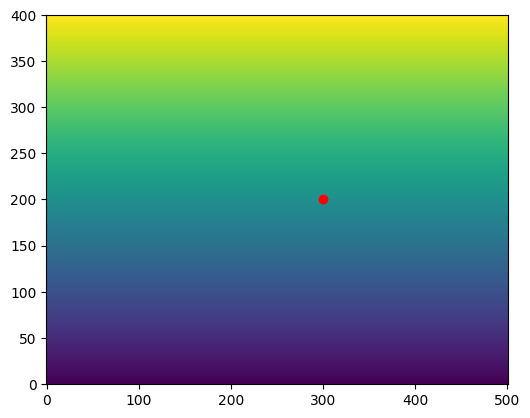

In [6]:
import matplotlib.pyplot as plt
pln = grid_B1
plt.imshow(pln, origin='lower')
plt.plot(300,200,'ro')

In [56]:
XY_shape[0]
XY_shape[1]
HHH_holder = np.zeros((XY_shape[0],XY_shape[1],4))
HAC_holder = np.zeros((XY_shape[0],XY_shape[1],3))

for i in range(XY_shape[0]):
  for j in range(XY_shape[1]):
    phi1_now = grid_B0[i,j]
    phi2_now = grid_B1[i,j]


    baryHHH,baryHAC = phaseInfo(phi1_now,phi2_now)
    HHH_holder[i,j,:] = baryHHH.flatten()
    HAC_holder[i,j,:] = baryHAC.flatten()
    # if i == 0:
    #   print(baryHHH.flatten())

In [8]:
baryHHH,baryHAC = phaseInfo(.2,.1)
print(baryHHH)
print(baryHAC)

[0.62022535 0.         0.         0.375     ]
[0.24522535 0.37022535 0.3845493 ]


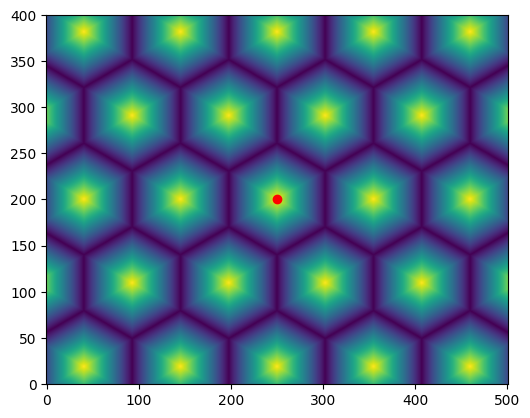

In [31]:
import matplotlib.pyplot as plt
fig = plt.figure()
pln = HAC_holder[:,:,0]
plt.imshow(pln, origin='lower')
plt.plot(250,200,'ro')

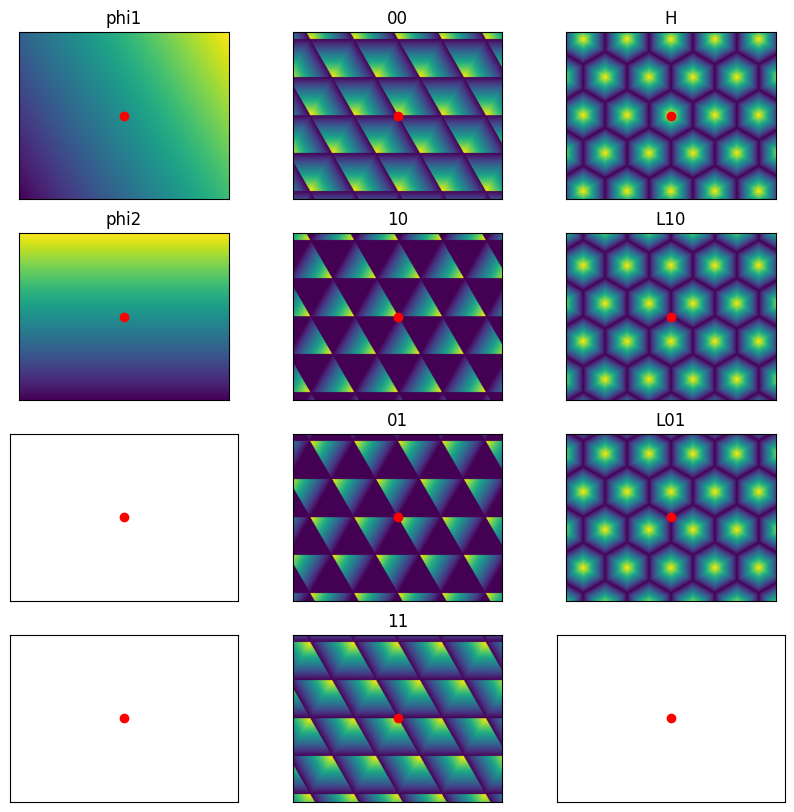

In [64]:
msb,nsb = 4,3
fig,axs = plt.subplots(msb,nsb,figsize=(10,10))
axs[0,1].imshow(HHH_holder[:,:,0], origin='lower')
axs[1,1].imshow(HHH_holder[:,:,1], origin='lower')
axs[2,1].imshow(HHH_holder[:,:,2], origin='lower')
axs[3,1].imshow(HHH_holder[:,:,3], origin='lower')

axs[0,2].imshow(HAC_holder[:,:,0], origin='lower')
axs[1,2].imshow(HAC_holder[:,:,1], origin='lower')
axs[2,2].imshow(HAC_holder[:,:,2], origin='lower')

axs[0,0].imshow(grid_B0, origin='lower')
axs[1,0].imshow(grid_B1, origin='lower')

tns = [['phi1','phi2'],['00','10','01','11'],['H','L10','L01']]

for isb in range(msb):
  for jsb in range(nsb):
    axs[isb,jsb].set_xticks([])
    axs[isb,jsb].set_yticks([])
    axs[isb,jsb].plot(250,200,'ro')
    try:
      tn = tns[jsb][isb]
      axs[isb,jsb].set_title(tn)
    except:
      a = 's'

https://chatgpt.com/share/689b26c1-0544-800b-84fa-788267176e6a